# **Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/iamso/Documents/Bharat Intern/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# **Data  Inspection**

In [3]:
df.shape

(545, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# **Data Cleaning**

In [6]:
# Checking for null values

df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

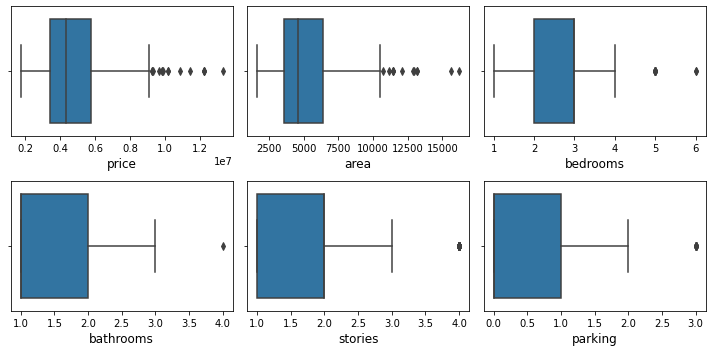

In [7]:
# Outlier Analysis

fig, axs = plt.subplots(2,3, figsize = (10,5))

columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

for i, col in enumerate(columns):
    sns.boxplot(data=df, x=col, ax=axs[i//3, i%3])
    axs[i//3, i%3].set_xlabel(col, fontsize=12)

# Adjust the height of the subplot to make room for the labels
plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
plt.show()

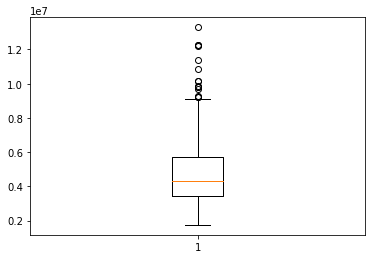

In [8]:
# Outlier treatment for price

plt.boxplot(df.price)
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

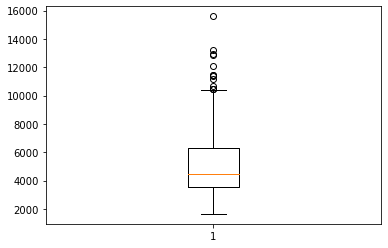

In [9]:
# Outlier treatment for area

plt.boxplot(df.area)
Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]

In [10]:
# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)

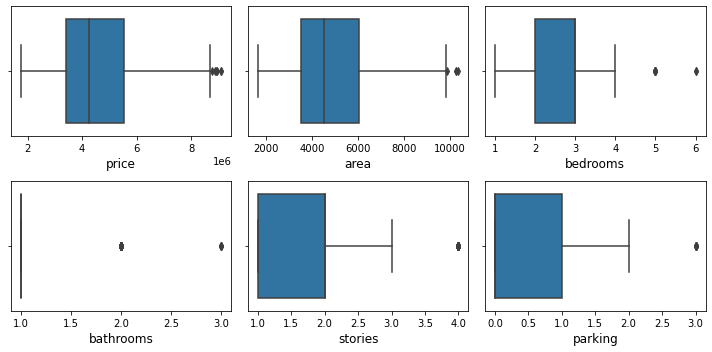

In [11]:
# Outlier Analysis

fig, axs = plt.subplots(2,3, figsize = (10,5))

columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

for i, col in enumerate(columns):
    sns.boxplot(data=df, x=col, ax=axs[i//3, i%3])
    axs[i//3, i%3].set_xlabel(col, fontsize=12)

# Adjust the height of the subplot to make room for the labels
plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
plt.show()

# **Exploratory Data Analytics**

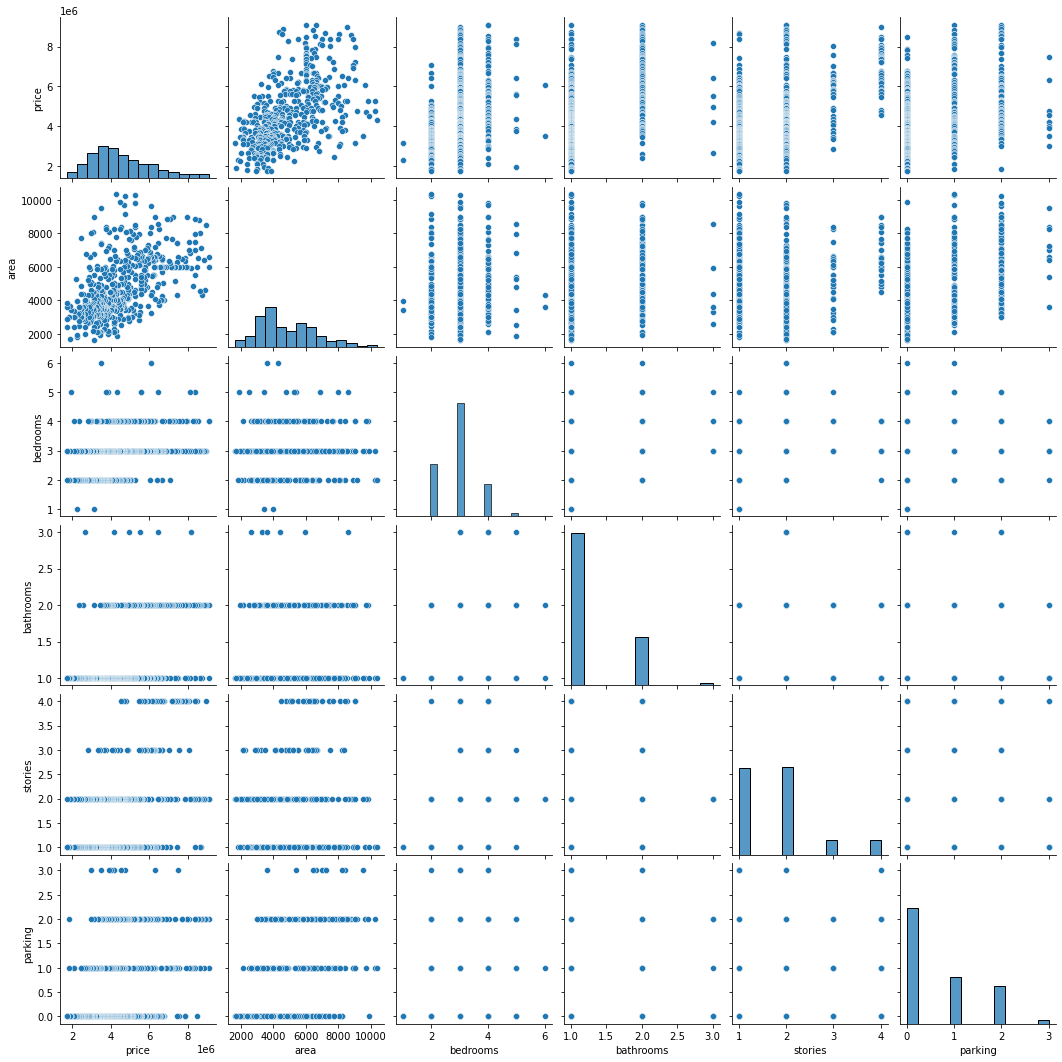

In [12]:
# Visualising Numeric Variables

sns.pairplot(df)
plt.show()

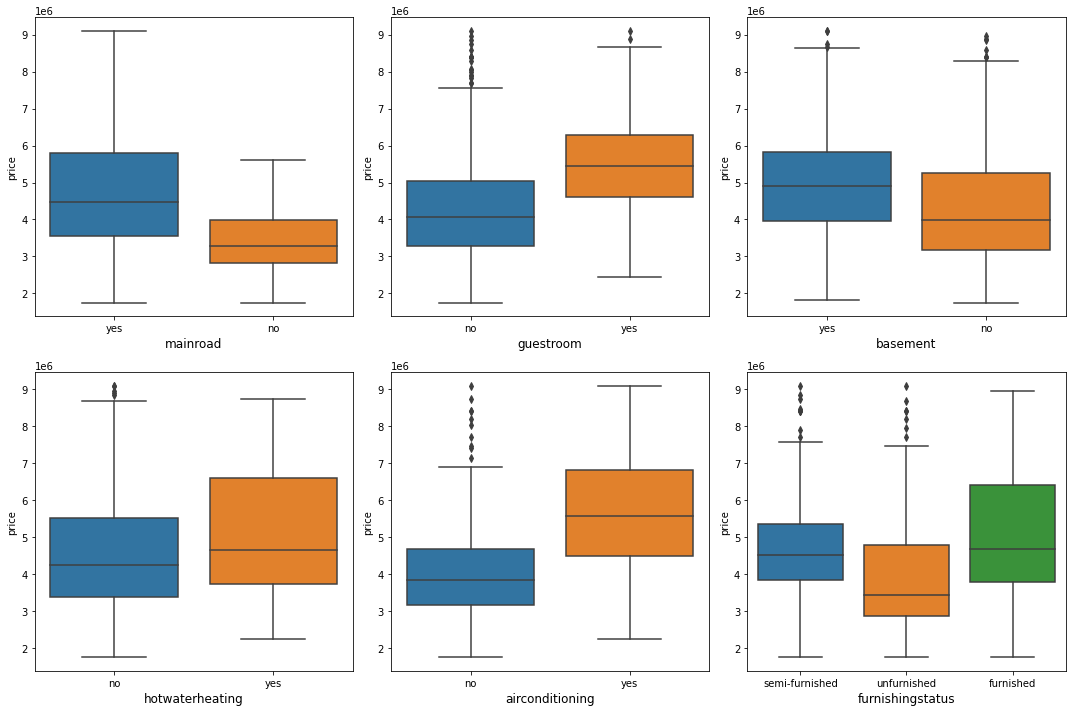

In [13]:
# Visualising Categorical Variables

fig, axs = plt.subplots(2,3, figsize = (15,10))

cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus']

for i, col in enumerate(cols):
    sns.boxplot(data=df, x=col, y=df['price'], ax=axs[i//3, i%3])
    axs[i//3, i%3].set_xlabel(col, fontsize=12)

# Adjust the height of the subplot to make room for the labels
plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
plt.show()

# **Data Preparation**

In [14]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [15]:
# Check the housing dataframe now

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
1,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
2,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
3,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
4,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


In [16]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

furnishingstatus = ['furnishingstatus']
df[furnishingstatus] = df[furnishingstatus].apply(le.fit_transform)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9100000,6000,4,1,2,1,0,1,0,0,2,0,1
1,9100000,6600,4,2,2,1,1,1,0,1,1,1,2
2,8960000,8500,3,2,4,1,0,0,0,1,2,0,0
3,8890000,4600,3,2,2,1,1,0,0,1,2,0,0
4,8855000,6420,3,2,2,1,0,0,0,1,1,1,1


# **Train-Test Split and Appropriate Scaling**

In [17]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.25, random_state = 42)

In [18]:
# Scaling using MinMaxScaler()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [19]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
446,0.166667,0.313493,0.6,0.0,0.333333,0,0,0,0,0,0.333333,0,2
515,0.000000,0.146189,0.4,0.0,0.000000,0,0,0,0,0,0.000000,0,0
154,0.473333,0.630584,0.4,0.0,0.000000,1,1,1,0,0,0.666667,1,1
25,0.833333,0.568511,0.4,0.0,0.333333,1,0,1,0,1,0.000000,1,0
265,0.333333,0.127277,0.6,0.5,0.333333,0,0,0,0,0,0.000000,0,1


In [20]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,0.380034,0.372733,0.387080,0.131783,0.267011,0.847545,0.173127,0.346253,0.049096,0.315245,0.208441,0.209302,1.093023
std,0.211900,0.202253,0.144461,0.232017,0.290752,0.359926,0.378846,0.476391,0.216347,0.465215,0.271815,0.407337,0.773008
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223810,0.221023,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.333333,0.330665,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.509524,0.508180,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


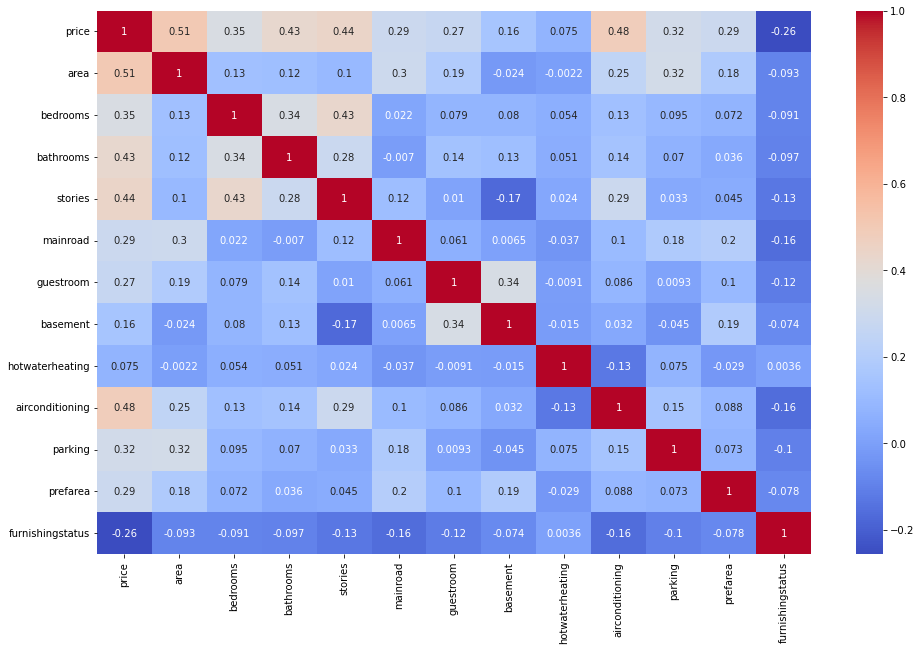

In [21]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="coolwarm")
plt.show()

# **Model Building**

In [22]:
y_train = df_train.pop('price')
X_train = df_train

In [23]:
# Importing Recursive Feature Elimination and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [24]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [25]:
rfe = RFE(lm)  # running RFE
rfe = rfe.fit(X_train, y_train)

In [26]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 5),
 ('guestroom', False, 4),
 ('basement', False, 6),
 ('hotwaterheating', False, 3),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', False, 2),
 ('furnishingstatus', False, 7)]

In [27]:
X_train.columns[rfe.support_]

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'airconditioning',
       'parking'],
      dtype='object')

In [28]:
X_train.columns[~rfe.support_]

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'prefarea',
       'furnishingstatus'],
      dtype='object')

In [29]:
col = ['area', 'bathrooms', 'stories', 'airconditioning', 'parking', 'prefarea']

# **Building model using statsmodel, for the detailed statistics**

In [30]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [31]:
# Adding a constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [32]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [33]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     95.00
Date:                Sun, 06 Aug 2023   Prob (F-statistic):           1.63e-72
Time:                        20:41:34   Log-Likelihood:                 229.16
No. Observations:                 387   AIC:                            -444.3
Df Residuals:                     380   BIC:                            -416.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1004      0.015     

In [34]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,5.03
1,area,1.20
3,stories,1.17
4,airconditioning,1.16
5,parking,1.12
2,bathrooms,1.10
6,prefarea,1.04


# **Residual Analysis of the train data**

In [36]:
y_train_price = lm.predict(X_train_rfe)
res = (y_train_price - y_train)

Text(0.5, 0, 'Errors')

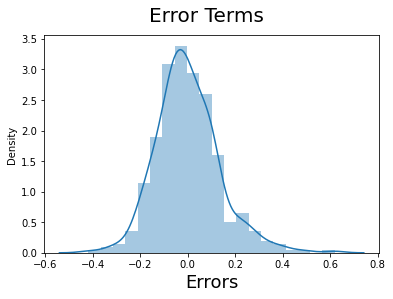

In [37]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)  # Plot heading
plt.xlabel('Errors', fontsize = 18) # X-label

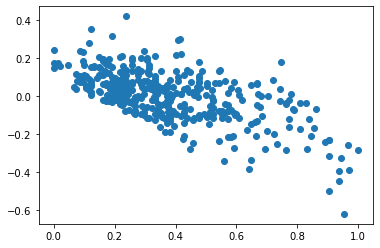

In [38]:
plt.scatter(y_train,res)
plt.show()

# **Model Evaluation**

In [39]:
num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
304,0.293590,0.642032,3,0.5,0.000000,1,1,1,0,0.0,1.0,0.0,0
501,0.069257,0.262125,3,0.0,0.333333,1,0,1,0,0.0,0.0,0.0,2
441,0.169491,0.334873,2,0.0,0.000000,1,0,0,0,0.0,0.0,0.0,0
153,0.474011,0.502309,3,0.0,0.000000,1,0,1,0,0.0,0.0,1.0,1
503,0.063529,0.415704,3,0.0,0.000000,0,0,0,0,1.0,0.0,1.0,2


In [40]:
# Divide into X_test and y_test

y_test = df_test.pop('price')
X_test = df_test

In [41]:
# Adding constant variable to test dataframe

X_test = sm.add_constant(X_test)

In [42]:
# Creating X_test_new dataframe by dropping variables from X_test

X_test_rfe = X_test[X_train_rfe.columns]

In [43]:
# Making predictions

y_pred = lm.predict(X_test_rfe)

In [44]:
# Checking R^2 value

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6243295199485701

Text(0, 0.5, 'y_pred')

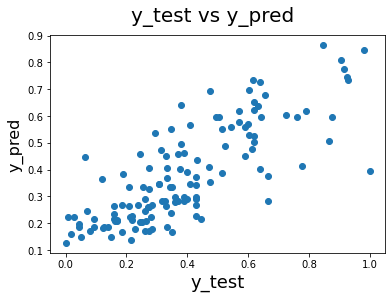

In [45]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label